                                                                            Лабораторна робота 3       
1. Зареєструватися у GitHub і створити репозиторій для першої лабораторної роботи

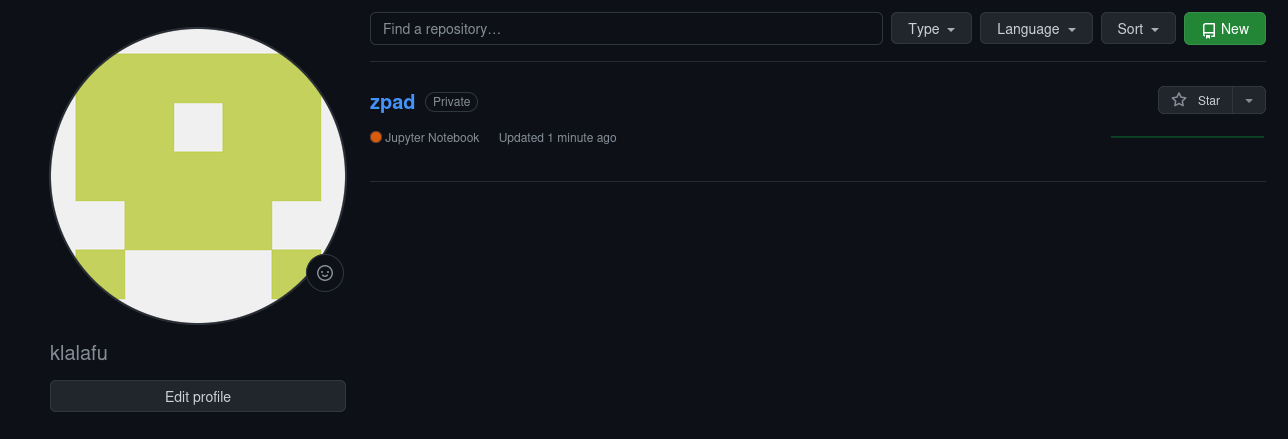

2. Запуште результати вашої першої лабораторної роботи за допомогою git push

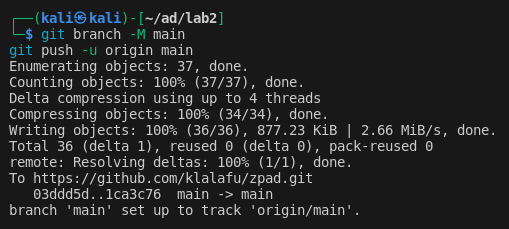

3. 

In [197]:
import pandas as pd
import urllib.request
from datetime import datetime
import re
import os 
import json
from spyre import server

In [416]:
dt = datetime.now()
dt_string = dt.strftime("%d_%m_%Y_%H:%M")

vhi_dir = '../lab2/vhi'

def download_csv(id, dir):
        if not any (file for file in os.listdir(f'{dir}') if file.split('_',2)[0] == f"vhi{id}"):
            urllib.request.urlretrieve(f"https://www.star.nesdis.noaa.gov/smcd/emb/vci/VH/get_TS_admin.php?country=UKR&provinceID={id}&year1=1981&year2=2024&type=Mean", f"{dir}/vhi{id}_{dt_string}.csv")
    
for i in range (1,28):
   download_csv(i, vhi_dir)   


def all_csv_to_dateframe(dir,new_ids):
    dfs = pd.DataFrame()
    for file in os.listdir(dir):
        id = file.split('_', 2)[0].split("vhi",2)[1]
        df = pd.read_csv(f'{dir}/{file}', index_col=False, header=1)
        df.columns = df.columns.str.strip()
        df.columns = df.columns.str.lower()
        df.rename(columns={'vhi<br>': 'vhi'}, inplace=True)
        df['year'] = df['year'].astype(str).str.replace('<tt><pre>', '').str.replace('</pre></tt>', '')
        df= df.drop(2236)
        with open(f'{dir}/{file}', 'r') as f:
            first_line = f.readline().strip()
        province = first_line.split(",", 3)[0].split(':', 2)[1].strip()
        df['id'] = new_ids[province]
        dfs = pd.concat([dfs, df], ignore_index=True)
    return dfs

new_ids= json.load( open( "new_ids.json" ) )

df1 = all_csv_to_dateframe(vhi_dir, new_ids)

import re
ffa = "0-1" 
print(bool(re.match(r"[1-51]-[2-52]", ffa)))


False


In [449]:
import __main__ as main
main.__file__ = "main_file"
import re
server.include_df_index = True

class NOAA(server.App):
    title = "NOAA Data Visualization"

    controls = [{  "type" : "hidden",
                    "id" : "update_data"}]
    
    inputs = [{
    "type":'dropdown',
    "label": 'Data',
    "options" : [{'label': "VCI", "value":"vci"},
                 {'label': "TCI", "value":"tci"},
                 {'label': "VHI", "value":"vhi"}],
    "key": 'ticker',
    "action_id" : "update_data",
    },
    
    {"type":'dropdown',
    "label": 'Province',
    "options" : [{"label": province, "value": province} for province in new_ids.keys()],

    "key": 'province',
    "action_id" : "update_data",
},dict(type='text',
         key='w_range',
         label ='Weeks range(1-52)',
         value='1-52',
         action_id='simple_html_output'),
    
    dict(type='text',
         key='year',
         label ='Year(1982-2024)',
         value='1982',
         action_id='simple_html_output')
]
    tabs = ["Plot", "Table"]

    outputs = [{ "type" : "plot",
                    "id" : "plot",
                    "control_id" : "update_data",
                    "tab" : "Plot"},
                { "type" : "table",
                    "id" : "table_id",
                    "control_id" : "update_data",
                    "tab" : "Table",
                    "on_page_load" : True }]

    def getData(self, params):
        ticker = params['ticker']
        province = params['province']
        
        #if not bool(re.match(r"[1-51]-[2-52]", params['w_range'])):
         #   params['w_range'] = "1-52"
        
        w_range = params['w_range']
        w_min = int(w_range.split('-')[0])
        w_max = int(w_range.split('-')[1])
        
        if params['year'].isnumeric():
            if int(params['year']) < 1982: params['year'] = '1982'
            elif int(params['year']) > 2024: params['year'] = '2024' 
        else:
            params['year'] = '1982'

       
        year = params['year']

        df1 = all_csv_to_dateframe(vhi_dir, new_ids)
        series = df1.loc[(df1['id'] == new_ids[province]) & (df1['year'] == year) & (df1['week'].between(w_min, w_max)) &(df1[ticker] != -1)][['year', ticker, 'week', 'id']]
        df1 = pd.DataFrame(series.reset_index(drop=True))
        return df1
    
    def getPlot(self, params):
        df = self.getData(params)
        ticker = params['ticker']
        df = pd.DataFrame(df[[ticker, 'week']])
        df.set_index('week', inplace=True)
        plt_obj = df.plot(grid=True, figsize=(17,8), color='green', linewidth=3, marker="o")
        plt_obj.set_ylabel(ticker.upper(), fontsize=18)
        plt_obj.set_xlabel("Week",fontsize=18)
        plt_obj.set_title(f"Mean {ticker.upper()} in {params['province']} in {params['year']} year",fontsize=20)
        return plt_obj


app = NOAA()

In [450]:
app.launch()

[27/Apr/2024:20:27:59] ENGINE Listening for SIGTERM.
INFO:cherrypy.error:[27/Apr/2024:20:27:59] ENGINE Listening for SIGTERM.
[27/Apr/2024:20:27:59] ENGINE Listening for SIGHUP.
INFO:cherrypy.error:[27/Apr/2024:20:27:59] ENGINE Listening for SIGHUP.
[27/Apr/2024:20:27:59] ENGINE Listening for SIGUSR1.
INFO:cherrypy.error:[27/Apr/2024:20:27:59] ENGINE Listening for SIGUSR1.
[27/Apr/2024:20:27:59] ENGINE Bus STARTING
INFO:cherrypy.error:[27/Apr/2024:20:27:59] ENGINE Bus STARTING
CherryPy Checker:
The Application mounted at '' has an empty config.

[27/Apr/2024:20:27:59] ENGINE Started monitor thread 'Autoreloader'.
INFO:cherrypy.error:[27/Apr/2024:20:27:59] ENGINE Started monitor thread 'Autoreloader'.
[27/Apr/2024:20:28:00] ENGINE Serving on http://127.0.0.1:8080
INFO:cherrypy.error:[27/Apr/2024:20:28:00] ENGINE Serving on http://127.0.0.1:8080
[27/Apr/2024:20:28:00] ENGINE Bus STARTED
INFO:cherrypy.error:[27/Apr/2024:20:28:00] ENGINE Bus STARTED


127.0.0.1 - - [27/Apr/2024:20:28:01] "GET /?ticker=vhi&province=Dnipropetrovs%27k&w_range=10-15&year=1999& HTTP/1.1" 200 442464 "" "Mozilla/5.0 (X11; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/115.0"


INFO:cherrypy.access.140090030519248:127.0.0.1 - - [27/Apr/2024:20:28:01] "GET /?ticker=vhi&province=Dnipropetrovs%27k&w_range=10-15&year=1999& HTTP/1.1" 200 442464 "" "Mozilla/5.0 (X11; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/115.0"


127.0.0.1 - - [27/Apr/2024:20:28:01] "GET /spinning_wheel HTTP/1.1" 200 2663 "http://127.0.0.1:8080/?ticker=vhi&province=Dnipropetrovs%27k&w_range=10-15&year=1999&" "Mozilla/5.0 (X11; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/115.0"


INFO:cherrypy.access.140090030519248:127.0.0.1 - - [27/Apr/2024:20:28:01] "GET /spinning_wheel HTTP/1.1" 200 2663 "http://127.0.0.1:8080/?ticker=vhi&province=Dnipropetrovs%27k&w_range=10-15&year=1999&" "Mozilla/5.0 (X11; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/115.0"


127.0.0.1 - - [27/Apr/2024:20:28:02] "GET /table?ticker=vhi&province=Dnipropetrovs%27k&w_range=10-15&year=1999&output_id=table_id& HTTP/1.1" 200 1074 "http://127.0.0.1:8080/?ticker=vhi&province=Dnipropetrovs%27k&w_range=10-15&year=1999&" "Mozilla/5.0 (X11; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/115.0"


INFO:cherrypy.access.140090030519248:127.0.0.1 - - [27/Apr/2024:20:28:02] "GET /table?ticker=vhi&province=Dnipropetrovs%27k&w_range=10-15&year=1999&output_id=table_id& HTTP/1.1" 200 1074 "http://127.0.0.1:8080/?ticker=vhi&province=Dnipropetrovs%27k&w_range=10-15&year=1999&" "Mozilla/5.0 (X11; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/115.0"


127.0.0.1 - - [27/Apr/2024:20:28:02] "GET /plot?ticker=vhi&province=Dnipropetrovs%27k&w_range=10-15&year=1999&output_id=plot& HTTP/1.1" 200 47206 "http://127.0.0.1:8080/?ticker=vhi&province=Dnipropetrovs%27k&w_range=10-15&year=1999&" "Mozilla/5.0 (X11; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/115.0"


INFO:cherrypy.access.140090030519248:127.0.0.1 - - [27/Apr/2024:20:28:02] "GET /plot?ticker=vhi&province=Dnipropetrovs%27k&w_range=10-15&year=1999&output_id=plot& HTTP/1.1" 200 47206 "http://127.0.0.1:8080/?ticker=vhi&province=Dnipropetrovs%27k&w_range=10-15&year=1999&" "Mozilla/5.0 (X11; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/115.0"


127.0.0.1 - - [27/Apr/2024:20:28:12] "GET /table?ticker=vhi&province=Volyn&w_range=1-100&year=1999&output_id=table_id& HTTP/1.1" 200 6351 "http://127.0.0.1:8080/?ticker=vhi&province=Volyn&w_range=1-100&year=1999&" "Mozilla/5.0 (X11; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/115.0"


INFO:cherrypy.access.140090030519248:127.0.0.1 - - [27/Apr/2024:20:28:12] "GET /table?ticker=vhi&province=Volyn&w_range=1-100&year=1999&output_id=table_id& HTTP/1.1" 200 6351 "http://127.0.0.1:8080/?ticker=vhi&province=Volyn&w_range=1-100&year=1999&" "Mozilla/5.0 (X11; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/115.0"


127.0.0.1 - - [27/Apr/2024:20:28:12] "GET /plot?ticker=vhi&province=Volyn&w_range=1-100&year=1999&output_id=plot& HTTP/1.1" 200 58699 "http://127.0.0.1:8080/?ticker=vhi&province=Volyn&w_range=1-100&year=1999&" "Mozilla/5.0 (X11; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/115.0"


INFO:cherrypy.access.140090030519248:127.0.0.1 - - [27/Apr/2024:20:28:12] "GET /plot?ticker=vhi&province=Volyn&w_range=1-100&year=1999&output_id=plot& HTTP/1.1" 200 58699 "http://127.0.0.1:8080/?ticker=vhi&province=Volyn&w_range=1-100&year=1999&" "Mozilla/5.0 (X11; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/115.0"
[27/Apr/2024:20:28:22] HTTP 
Traceback (most recent call last):
  File "/home/kali/anaconda3/envs/env1/lib/python3.11/site-packages/cherrypy/_cprequest.py", line 638, in respond
    self._do_respond(path_info)
  File "/home/kali/anaconda3/envs/env1/lib/python3.11/site-packages/cherrypy/_cprequest.py", line 697, in _do_respond
    response.body = self.handler()
                    ^^^^^^^^^^^^^^
  File "/home/kali/anaconda3/envs/env1/lib/python3.11/site-packages/cherrypy/lib/encoding.py", line 223, in __call__
    self.body = self.oldhandler(*args, **kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/kali/anaconda3/envs/env1/lib/python3.11/site-packages

127.0.0.1 - - [27/Apr/2024:20:28:22] "GET /plot?ticker=vhi&province=Transcarpathia&w_range=0q4tioj&year=1999&output_id=plot& HTTP/1.1" 500 2113 "http://127.0.0.1:8080/?ticker=vhi&province=Transcarpathia&w_range=0q4tioj&year=1999&" "Mozilla/5.0 (X11; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/115.0"


INFO:cherrypy.error.140090030519248:[27/Apr/2024:20:28:22] HTTP 
Request Headers:
  Remote-Addr: 127.0.0.1
  HOST: 127.0.0.1:8080
  USER-AGENT: Mozilla/5.0 (X11; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/115.0
  ACCEPT: */*
  ACCEPT-LANGUAGE: en-US,en;q=0.5
  ACCEPT-ENCODING: gzip, deflate, br
  X-REQUESTED-WITH: XMLHttpRequest
  CONNECTION: keep-alive
  REFERER: http://127.0.0.1:8080/?ticker=vhi&province=Transcarpathia&w_range=0q4tioj&year=1999&
  SEC-FETCH-DEST: empty
  SEC-FETCH-MODE: cors
  SEC-FETCH-SITE: same-origin
INFO:cherrypy.access.140090030519248:127.0.0.1 - - [27/Apr/2024:20:28:22] "GET /plot?ticker=vhi&province=Transcarpathia&w_range=0q4tioj&year=1999&output_id=plot& HTTP/1.1" 500 2113 "http://127.0.0.1:8080/?ticker=vhi&province=Transcarpathia&w_range=0q4tioj&year=1999&" "Mozilla/5.0 (X11; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/115.0"


127.0.0.1 - - [27/Apr/2024:20:28:22] "GET /table?ticker=vhi&province=Transcarpathia&w_range=0q4tioj&year=1999&output_id=table_id& HTTP/1.1" 500 2162 "http://127.0.0.1:8080/?ticker=vhi&province=Transcarpathia&w_range=0q4tioj&year=1999&" "Mozilla/5.0 (X11; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/115.0"


INFO:cherrypy.access.140090030519248:127.0.0.1 - - [27/Apr/2024:20:28:22] "GET /table?ticker=vhi&province=Transcarpathia&w_range=0q4tioj&year=1999&output_id=table_id& HTTP/1.1" 500 2162 "http://127.0.0.1:8080/?ticker=vhi&province=Transcarpathia&w_range=0q4tioj&year=1999&" "Mozilla/5.0 (X11; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/115.0"
